# Cheque validation using image processing

## Introduction

Automation in industry are growing rapidly, at this point every type of industry need automation for better performance and efficiency. Banking and finance sector plays very important role since many businesses still using cheques as their reliable method to transfer money. Behind the scene, these cheques are processed by humans, and that’s why it is a point of concern. Since, the application of AI and ML are capturing the market. Using the concept of Artificial intelligence(AI) in banking and finance sector would make everything so efficient. In manual verification, the cheques are validated by the employees of bank. This create entire process so time consuming. The automated process of validating cheque includes extraction of important parameters like payee name, amount, signature, date, account no. then, using the values of these parameters we can decide the cheque is valid or not. For example, the signature in cheque and that in database are not matching then we can conclude that the cheque is invalid. The primary goal of the system is to develop a accurate model which reads the handwritten texts like name of the payee, date and amount in the cheque with the least possible error and then processes the extracted data using python.

## EXISTING SYSTEM

There are two ways in which customers can deposit a cheque. First one is using pay slip. And second one is using a machine. In either of the cases, the cheque is validated by the employee of the bank, by looking at each of the parameter written on the cheque. Which is time consuming and also error prone in some rare conditions. 

## PROPOSED SYSTEM

The proposed system will take the image of cheque as input. Then extract the details from cheque like account number, payee name, amount, signature. This is the first and initial stage of the system. After extracting the components from the image, we have to perform some necessary validation and run an algorithm to verify the signature. As well as, the amount to be paid in words and digits should be matched with each other, date should be valid, etc. If at any stage system comes to know that, it is an invalid cheque, it will display the message accordingly. After performing these operations, our system should be able to display proper message whether the cheque is valid or not. 



According to computer vision's perspective there are three types of data available on cheque:

    1. Which is already available.
    2. Filled data by user.
    3. Magnetic ink data.


Among these data,

    First one can be extracted using OCR. There are lot of OCR available like pytessarect, keras-ocr, EasyOCR,etc.

    Second one can be extracted using HTR(Handwriting recognition tool).
    
    Third also can be extracted using MICR reader.
    
### we can extract these data in one-go using this project.

## Flowchart of the system

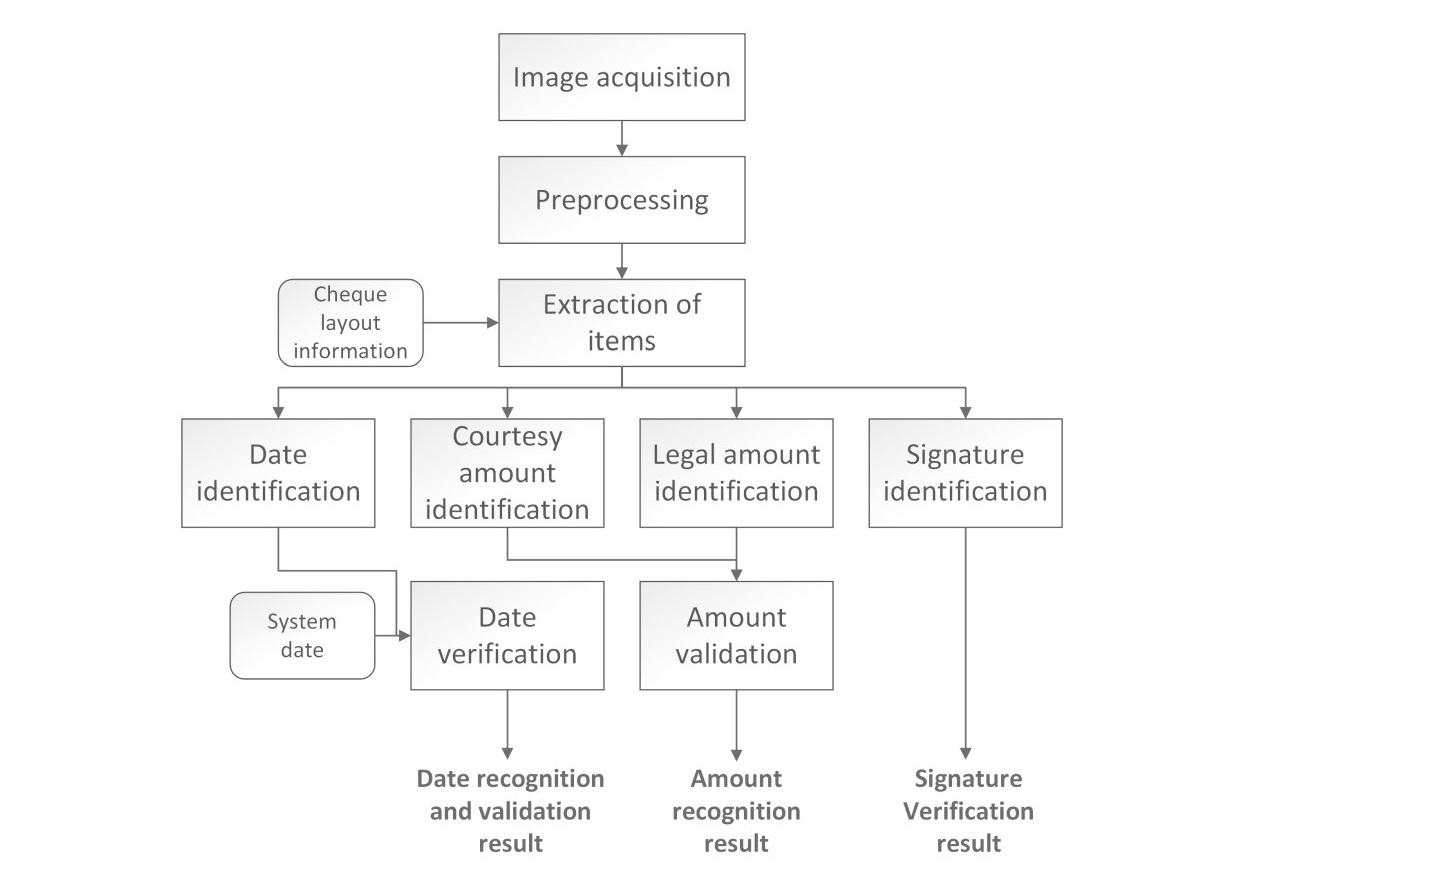

## The important segmentation to be done to extract user data.

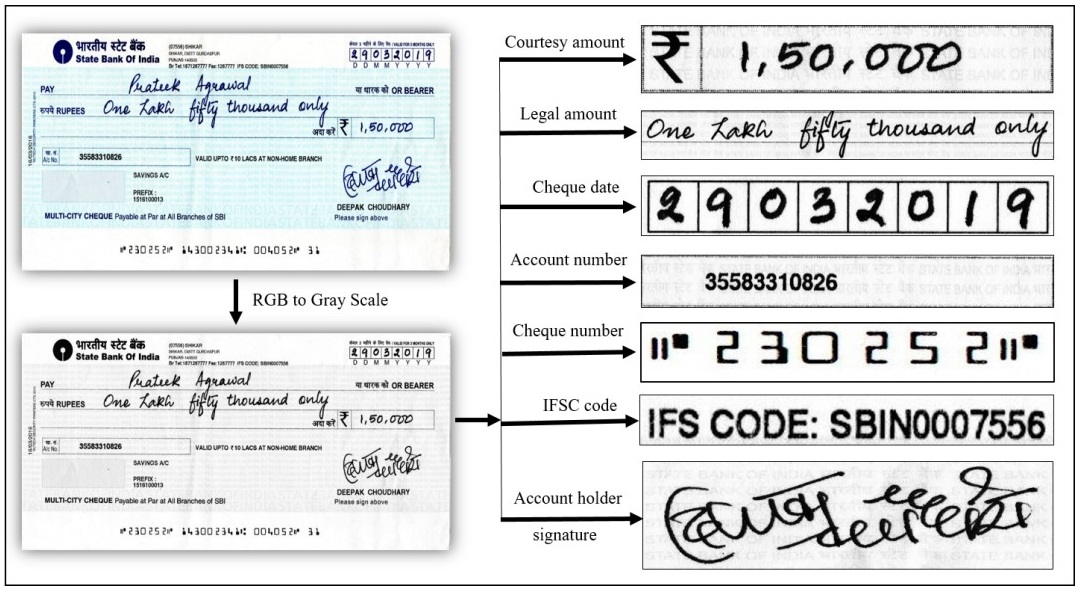

### To segment the image we need to import cv2

In [2]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

### To extract the text we need to import EasyOCR

In [3]:
import easyocr

### Getting the image

In [143]:
img = cv2.imread('Sbi5.png');

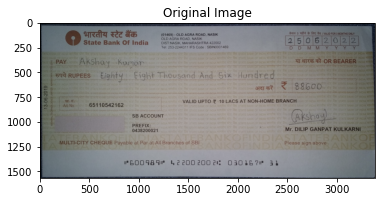

In [144]:
plt.title("Original Image")
plt.imshow(img)

In [145]:
gray0 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [131]:
img.shape

(1565, 3381, 3)

In [132]:
resize = cv2.resize(img, (3900,1800))

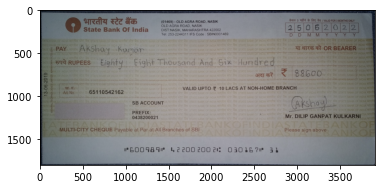

In [133]:
plt.imshow(resize)

### Applying blur effect to reduce noice.

In [153]:
blur = cv2.GaussianBlur(resize, (3,3), cv2.BORDER_DEFAULT)

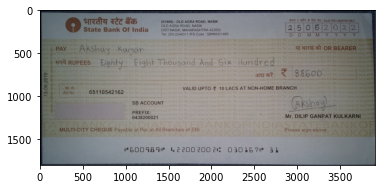

In [154]:
plt.imshow(blur)

In [155]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

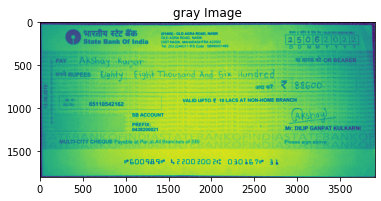

In [156]:
plt.title("gray Image")
plt.imshow(gray)

### Extracting branch details

In [157]:
BrDetail = blur[20:350, 1300:2400]

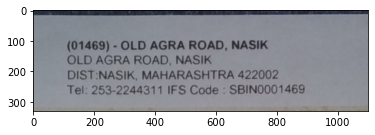

In [158]:
plt.imshow(BrDetail)

In [159]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [160]:
BrDt =  reader.readtext(BrDetail, detail=0)

In [161]:
BrDt

['(01469) ',
 'OLD AGRA ROAD, NASIK',
 'OLD AGRA ROAD',
 'NASIK',
 'DIST:NASIK, MAHARASHTRA 422002',
 'Tel: 253-2244311 IFS Code',
 'SBINO001469']

### Extracting Account No.

In [162]:
AccNo = blur[850:1050, 450:1050]

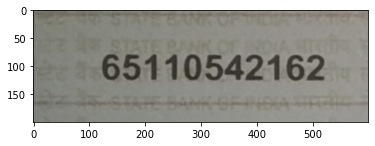

In [163]:
plt.imshow(AccNo)

### Apply blur to reduce noice (Watermarks)

In [164]:
acblur = cv2.GaussianBlur(AccNo, (7,7), cv2.BORDER_DEFAULT)

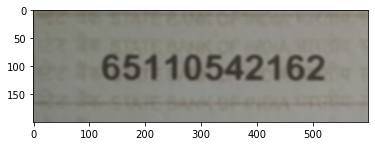

In [165]:
plt.imshow(acblur)

In [166]:
AcNo =  reader.readtext(acblur, detail=0)

In [167]:
AcNo

['65110542162']

### Account holder's name

In [168]:
AccNm = blur[1170:1300, 2650:3800]

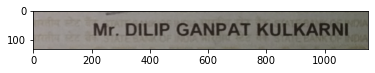

In [169]:
plt.imshow(AccNm)

### Apply blur

In [170]:
acnmblur = cv2.GaussianBlur(AccNm, (9,9), cv2.BORDER_DEFAULT)

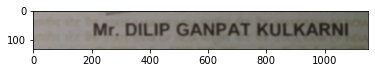

In [171]:
plt.imshow(acnmblur)

In [172]:
AcNm =  reader.readtext(acnmblur, detail=0)

In [173]:
AcNm[0] 

'Mr. DILIP GANPAT KULKARNI'

### Prefix

In [174]:
prefix = blur[1000:1300, 1000:1500]

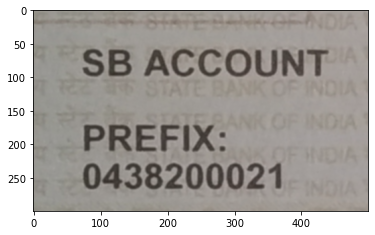

In [175]:
plt.imshow(prefix)

### Blur the image

In [176]:
AccPrefix = cv2.GaussianBlur(prefix, (9,9), cv2.BORDER_DEFAULT)

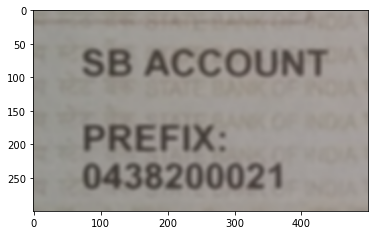

In [177]:
plt.imshow(AccPrefix)

In [178]:
AcPrefix =  reader.readtext(AccPrefix, detail=0)

In [179]:
AcPrefix

['SB ACCOUNT', 'PREFIX:', '0438200021']

### Extracting Date

In [185]:
dt = blur[130:250, 2800:3750]

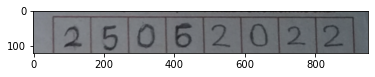

In [186]:
plt.imshow(dt)

In [187]:
date = cv2.GaussianBlur(dt, (5,5), cv2.BORDER_DEFAULT)

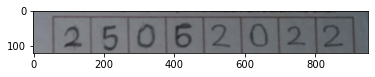

In [188]:
plt.imshow(date)

In [189]:
Date =  reader.readtext(date, detail=0)

In [190]:
Date

['', '2', '5/0/6/2', '0 /2', '2']

In [191]:
datestr="".join(Date)
dt = list(datestr)
for i in range(len(dt)):
    if dt[i] == '/' or dt[i] == " " or dt[i]=="|":
        dt[i]=""
dt
datestr = "".join(dt)
datestr
dt = list(datestr)
slash = ['/']
dt = dt[:2] + slash + dt[2:]
dt = dt[:5] + slash + dt[5:]
dt
datestr = "".join(dt)
datestr

'25/06/2022'

### Payee name

In [215]:
pnm = blur[300:550, 300:1700]

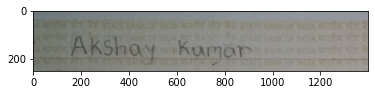

In [216]:
plt.imshow(pnm)

In [217]:
payenm = cv2.GaussianBlur(pnm, (11,11), cv2.BORDER_DEFAULT)

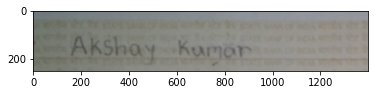

In [218]:
plt.imshow(payenm)

In [219]:
pname =  reader.readtext(payenm, detail=0)

In [220]:
pname

['Akshay', 'humar']

### Amount extraction

In [260]:
amt = blur[500:680, 580:3000]

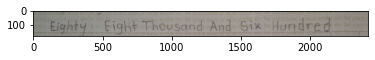

In [261]:
plt.imshow(amt)

In [262]:
amtblur = cv2.GaussianBlur(amt, (11,11), cv2.BORDER_DEFAULT)

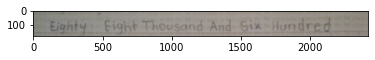

In [263]:
plt.imshow(amtblur)

In [264]:
amount =  reader.readtext(amtblur, detail=0)

In [265]:
amount

['Eighty', 'Eight Thousand_And', 'Gix', 'Hundred']

### Courtesy amount

In [266]:
camt = blur[600:800, 2950:3600]

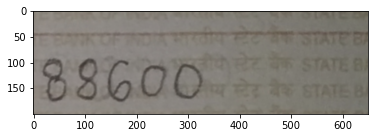

In [267]:
plt.imshow(camt)

In [268]:
camtblur = cv2.GaussianBlur(camt, (11,11), cv2.BORDER_DEFAULT)

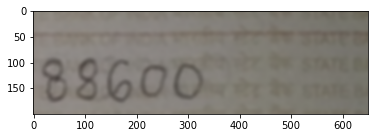

In [269]:
plt.imshow(camtblur)

In [270]:
camount =  reader.readtext(camtblur, detail=0)

In [271]:
camount

['88600']

### Signature validation

In [293]:
sign = img[820:1050, 2380:3500]

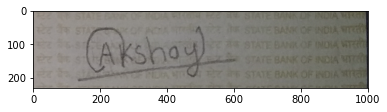

In [294]:
plt.imshow(sign)

In [274]:
 sift = cv2.SIFT_create()

In [295]:
DataSign = cv2.imread('sign/sign_second/sign1.png')

In [296]:
keypoints1, descriptors1 = sift.detectAndCompute(sign, None)
keypoints2, descriptors2 = sift.detectAndCompute(DataSign, None)

In [297]:
bf = cv2.BFMatcher()

In [298]:
matches = bf.knnMatch (descriptors1, descriptors2,k=2)

In [299]:
good1 = []

for m1, m2 in matches:
  if m1.distance < 0.80*m2.distance:
    good1.append([m1])
    


In [300]:
matches = bf.knnMatch (descriptors2, descriptors1,k=2)

In [301]:
good2=[]
for m1, m2 in matches:
  if m1.distance < 0.80*m2.distance:
    good2.append([m1])

In [302]:
good=[]
for i in good1:
    img1 = i[0].queryIdx
    img2 = i[0].trainIdx
    (x1,y1)=keypoints1[img1].pt
    (x2,y2)=keypoints2[img2].pt
    
    for j in good2:
        img1 = j[0].queryIdx
        img2 = j[0].trainIdx
        (a1,b1)=keypoints2[img1].pt
        (a2,b2)=keypoints1[img2].pt
        
        if (a1==x2 and b1==y2) and (a2==x1 and b2==y1):
            good.append(i)

In [303]:
len(good)

5

In [304]:
len(good)/len(matches)*100

0.5649717514124294

In [305]:
len(good1)


19

In [306]:
len(good2)

126

In [316]:
if (len(good2) > len(good1)) and (len(good2)>100):
    print("Signature verified")
    sig=True
elif len(good)>100:
    print("Signature verified")
    sig=True
else:
    print("Signature not verified")
    sig=False

Signature verified


In [308]:
MIC = blur[1450:1720, 700:3000]

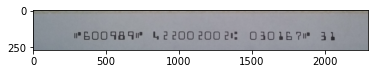

In [309]:
plt.imshow(MIC)

## Reading MIC(Mahnetic Ink Character)

In [310]:
import pytesseract

In [311]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\omkar\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'



### Get the MICR reader from this link !wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata




### Paste it into dir. C:\Users\omkar\AppData\Local\Programs\Tesseract-OCR\tessdata

In [312]:
res = pytesseract.image_to_string(MIC, lang='mcr')

In [313]:
res

'c600989c 42200 200 2a 030167000 31\n'

Details of cheque: 
Br. Name: 
	 (01469) 
	 OLD AGRA ROAD, NASIK
	 OLD AGRA ROAD
	 NASIK
	 DIST:NASIK, MAHARASHTRA 422002
	 Tel: 253-2244311 IFS Code
	 SBINO001469

Account No.:  65110542162

Account holder's Name:  Mr. DILIP GANPAT KULKARNI

SB Account prefix:  0438200021

Cheque Date:  25/06/2022

Payee Name:  Akshay humar

Formal amount:  Eighty Eight Thousand_And Gix Hundred 

Courtesy amount:  88600

MICR:  c600989c 42200 200 2a 030167000 31

Signature status:  Verified

Signature: 



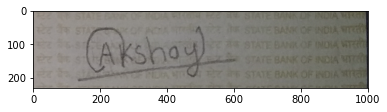

In [317]:
print("Details of cheque: ")
print("Br. Name: ")
for i in BrDt:
    print("\t",i)
    
print("\nAccount No.: ", AcNo[0])

print("\nAccount holder's Name: ", AcNm[0])

print("\nSB Account prefix: ",AcPrefix[2])
print("\nCheque Date: ", datestr)
print("\nPayee Name: ", pname[0]+" "+pname[1])
print("\nFormal amount: ",end=" ")
for i in amount:
    print(i,end=" ")
print("\n\nCourtesy amount: ", camount[0])
print("\nMICR: ",res)


print("Signature status: ",end=" ")
if(sig):
    print("Verified")
else:
    print("Not verified")
print("\nSignature: \n")
plt.imshow(sign)


Database signature


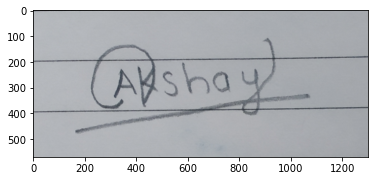

In [318]:
print("Database signature")
plt.imshow(DataSign)